# Importing required libraries 
We are going to import numpy and pandas for data handling and mining. We are also going to import pyplot from matplotlib and seaborn for data visualization.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Reading data from csv file
The data for building our ML model is saved in the common directory as "laptop_price.csv"

In [55]:
data = pd.read_csv('csvs/laptop_price.csv', encoding = 'latin-1')
display(data.head())

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data properties
Let's look at some features and properties of our data

In [56]:
print(f'Shape of the dataframe: {data.shape}.')
print(f'There are {data.shape[0]} tuples/rows and {data.shape[1]} features/columns in it.')
print(f'Number of duplicate tuples in the dataframe: {data.duplicated().sum()}.', end = '\n\n')
print(f'Summary of NULL values if any in given features/columns:')
print(data.isnull().sum(), end = '\n\n')
print(f'Summary of our data: ')
print(data.info())

Shape of the dataframe: (1303, 13).
There are 1303 tuples/rows and 13 features/columns in it.
Number of duplicate tuples in the dataframe: 0.

Summary of NULL values if any in given features/columns:
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Summary of our data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   obj

# Data Preprocessing

As we can see in the print statements above, we dont have to worry about duplicate records or null values in our data.<br>
Let's remove the laptop_ID and the Product features/columns as they are not required for our model.

In [57]:
data.drop(['laptop_ID', 'Product'], axis = 1, inplace = True)
display(data.sample(5))

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1025,HP,Ultrabook,12.5,1366x768,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,1559.00
280,Lenovo,Notebook,17.3,1600x900,Intel Core i7 7500U 2.7GHz,6GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.8kg,859.00
261,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,Intel HD Graphics 520,No OS,2.2kg,444.00
358,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,Windows 10,2.36kg,557.37
1201,Lenovo,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,8GB,500GB HDD,Nvidia GeForce 920MX,No OS,2.2kg,629.00


We need either numerical, boolean or categorical features for training our model. In the data provided, we have only 2 out of 12 features that our model can use.

### The "Ram" and "Weight" features

Let's remove "GB" from RAM and "kg" from Weight features and convert them into int and float dtypes respectively

In [58]:
data['Ram'] = data['Ram'].str[:-2]
data['Ram'] = data['Ram'].astype('int')
data['Weight'] = data['Weight'].str[:-2]
data['Weight'] = data['Weight'].astype('float')

In [59]:
display(data.head(5))
print(f'Summary of our data: ')
print(data.info())

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


Summary of our data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB
None


### The "Company" feature

Value summary of "Company" feature: 
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64


Text(0.5, 0, 'Number of devices')

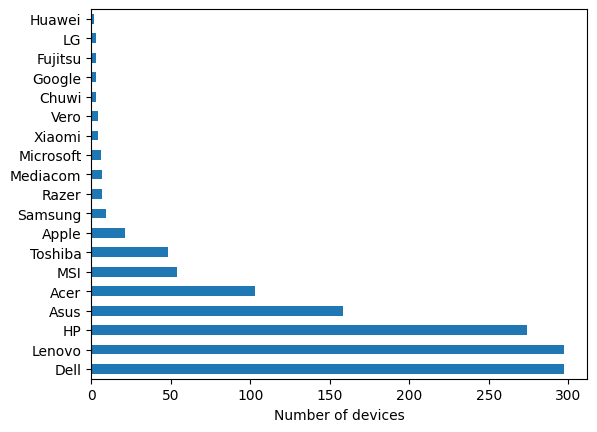

In [60]:
print(f'Value summary of "Company" feature: ')
print(data['Company'].value_counts())
data['Company'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of devices')

In [61]:
company_list = data['Company'].value_counts().iloc[:8].index
data = data[data['Company'].isin(company_list)]

### The "TypeName" feature

Value summary of "TypeName" feature: 
Notebook              708
Gaming                200
Ultrabook             173
2 in 1 Convertible    118
Workstation            29
Netbook                24
Name: TypeName, dtype: int64


Text(0.5, 0, 'Number of devices')

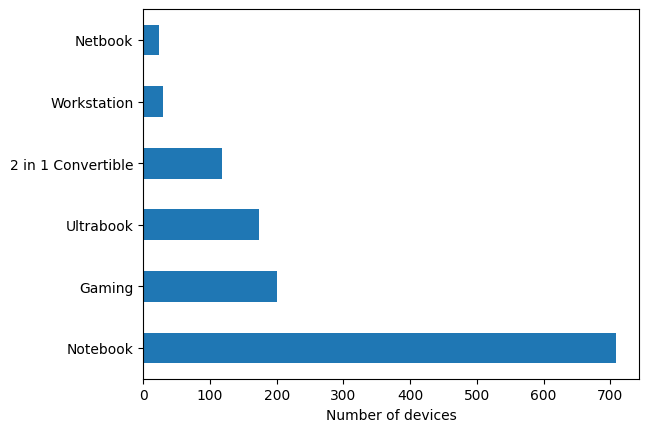

In [62]:
print(f'Value summary of "TypeName" feature: ')
print(data['TypeName'].value_counts())
data['TypeName'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of devices')

### The "ScreenResolution" feature

In [63]:
print(f'Value summary of "ScreenResolution" feature: ')
print(data['ScreenResolution'].value_counts())

Value summary of "ScreenResolution" feature: 
Full HD 1920x1080                                494
1366x768                                         276
IPS Panel Full HD 1920x1080                      221
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                8
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440                    5


As we can see, the information in this feature/column is mixed and not seperate. The distribution is also not good for any model.<br><br>
We will extract the resolution of the screen.<br>
We will also find out whether the device has "touchscreen" feature, and also whether it is an IPS panel.

In [64]:
data['Resolution'] = data['ScreenResolution'].str.split(' ').apply(lambda x: x[-1])
data['ScreenWidth'] = data['Resolution'].str.split('x').apply(lambda x: x[0])
data['ScreenWidth'] = data['ScreenWidth'].astype(int)
data['ScreenHeight'] = data['Resolution'].str.split('x').apply(lambda x: x[1])
data['ScreenHeight'] = data['ScreenHeight'].astype(int)
data.drop('Resolution', axis = 1, inplace = True)

In [65]:
data['Resolution'] = (data['ScreenWidth'] * data['ScreenHeight']) / 1000000
data['Resolution'] = data['Resolution'].astype(float)
data.drop('ScreenWidth', axis = 1, inplace = True)
data.drop('ScreenHeight', axis = 1, inplace = True)

In [66]:
data['TouchScreen'] = data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
data['TouchScreen'] = data['TouchScreen'].astype(bool)
data['IPS_Panel'] = data['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)
data['IPS_Panel'] = data['IPS_Panel'].astype(bool)
data.drop('ScreenResolution', axis = 1, inplace = True)
display(data.head(5))

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,TouchScreen,IPS_Panel
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,4.0960,False,True
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.2960,False,False
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.0736,False,False
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,5.1840,False,True
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,4.0960,False,True


In [67]:
print(f'Description of "Resolution" feature: ')
print(data['Resolution'].describe())

Description of "Resolution" feature: 
count    1252.000000
mean        2.140765
std         1.365546
min         1.049088
25%         1.440000
50%         2.073600
75%         2.073600
max         8.294400
Name: Resolution, dtype: float64


Value summary of "TouchScreen" feature: 
False    1079
True      173
Name: TouchScreen, dtype: int64


Text(0.5, 0, 'Number of devices')

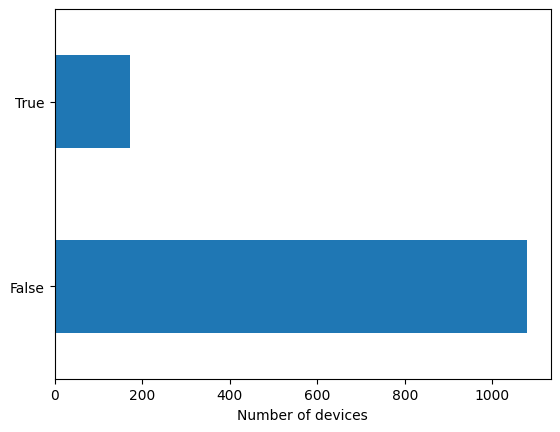

In [68]:
print(f'Value summary of "TouchScreen" feature: ')
print(data['TouchScreen'].value_counts())
data['TouchScreen'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of devices')

Value summary of "IPS_Panel" feature: 
False    905
True     347
Name: IPS_Panel, dtype: int64


Text(0.5, 0, 'Number of devices')

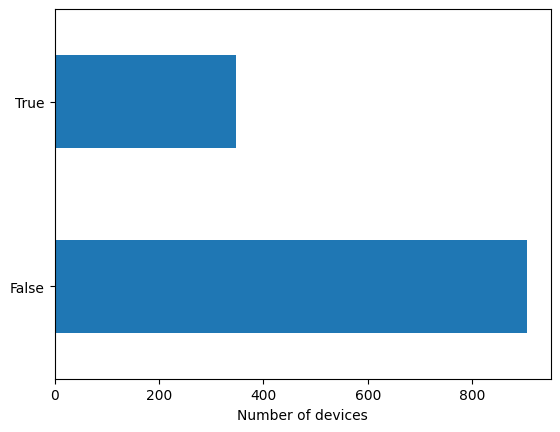

In [69]:
print(f'Value summary of "IPS_Panel" feature: ')
print(data['IPS_Panel'].value_counts())
data['IPS_Panel'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of devices')

Resolution of screen is stored as float dtype and its value is in magepixels. It's range is from 1.05 to 8.3 which is a good range value.<br>
Touchscreen and IPS_Panel are stored as bool dtype. True for present and False for absent. 

### The "Cpu" feature

In [70]:
print(f'Value summary of "Cpu" feature: ')
print(data['Cpu'].value_counts())

Value summary of "Cpu" feature: 
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     126
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
Intel Core i7 2.8GHz             1
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Name: Cpu, Length: 111, dtype: int64


As we can see, the first three words are CPU brand and the last word the CPU frequency.<br>
Let's extract them.

In [71]:
data['CPU_Brand'] = data['Cpu'].str.split(' ').apply(lambda x: x[:4])
data['CPU_Frequency'] = data['Cpu'].str.split(' ').apply(lambda x: x[-1])
data['CPU_Frequency'] = data['CPU_Frequency'].apply(lambda x: x[:-3])
data['CPU_Frequency'] = data['CPU_Frequency'].astype('float')

In [72]:
print(f'Description of "CPU_Frequency" feature: ')
print(data['CPU_Frequency'].describe())

Description of "CPU_Frequency" feature: 
count    1252.000000
mean        2.307109
std         0.498675
min         0.900000
25%         2.000000
50%         2.500000
75%         2.700000
max         3.600000
Name: CPU_Frequency, dtype: float64


In [73]:
print(f'Value summary of "CPU_Brand" feature: ')
print(data['CPU_Brand'].value_counts())

Value summary of "CPU_Brand" feature: 
[Intel, Core, i5, 7200U]            186
[Intel, Core, i7, 7700HQ]           143
[Intel, Core, i7, 7500U]            126
[Intel, Core, i3, 6006U]             81
[Intel, Celeron, Dual, Core]         76
                                   ... 
[Intel, Core, M, 7Y30]                1
[Intel, Xeon, E3-1535M, v6]           1
[Intel, Atom, x5-Z8350, 1.44GHz]      1
[Intel, Core, M, M3-6Y30]             1
[Intel, Core, i5, 2.9GHz]             1
Name: CPU_Brand, Length: 90, dtype: int64


The Intel Core series has three main processors i.e. i3, i5 and i7. AMD has a few processors and there are other processors of Intel in very small numbers.<br>
Hence we'll group this feature/column by levels of Intel Core i3, i5 or i7 and AMD Processor and Other Intel Processors

Let's define a function for performing the above discussed task.

In [74]:
def categorize_processor(input):
    if input == 'Intel Core i7' or input == 'Intel Core i5' or input == 'Intel Core i3':
        return input
    else:
        if input.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [75]:
data['CPU_Brand'] = data['Cpu'].apply(lambda x: " ".join(x.split(" ")[0:3]))
data['CPU_Brand'] = data['CPU_Brand'].apply(categorize_processor)
data.drop('Cpu', axis = 1, inplace = True)
display(data.sample(10))

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,TouchScreen,IPS_Panel,CPU_Brand,CPU_Frequency
520,Lenovo,Gaming,15.6,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,1399.00,2.073600,False,True,Intel Core i7,2.8
642,Lenovo,Ultrabook,14.0,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.14,2450.00,2.073600,False,True,Intel Core i7,2.7
505,Lenovo,Notebook,13.3,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.44,949.00,2.073600,False,False,Intel Core i5,2.5
312,MSI,Gaming,15.6,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,2099.00,2.073600,False,True,Intel Core i7,2.8
919,MSI,Gaming,15.6,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,1119.91,2.073600,False,False,Intel Core i5,2.5
242,Asus,Notebook,17.3,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,No OS,2.69,889.00,2.073600,False,False,Intel Core i7,2.7
555,Asus,Notebook,15.6,4,500GB HDD,Intel HD Graphics 500,Linux,2.00,224.00,1.049088,False,False,Other Intel Processor,1.1
752,Asus,Notebook,15.6,4,1TB HDD,Nvidia GeForce GTX 950M,No OS,2.45,579.00,1.049088,False,False,Intel Core i5,2.3
320,HP,Notebook,14.0,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,1292.00,2.073600,False,False,Intel Core i7,2.7
611,Dell,Gaming,15.6,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01,2.073600,False,False,Intel Core i7,2.6


Let's check the summary and related information of CPU_Brand after applying our categorizing function.

Value summary of "CPU_Brand" feature: 
Intel Core i7            505
Intel Core i5            411
Other Intel Processor    138
Intel Core i3            136
AMD Processor             62
Name: CPU_Brand, dtype: int64


Text(0.5, 0, 'Number of devices')

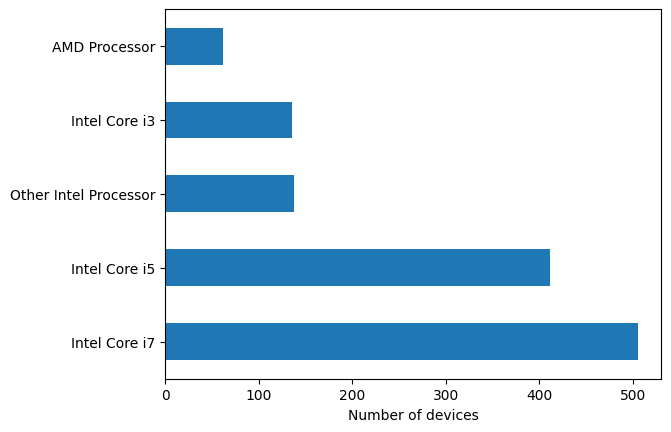

In [76]:
print(f'Value summary of "CPU_Brand" feature: ')
print(data['CPU_Brand'].value_counts())
data['CPU_Brand'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of devices')

### The "Gpu" feature

In [77]:
print(f'Value summary of "Gpu" feature: ')
print(data['Gpu'].value_counts())

Value summary of "Gpu" feature: 
Intel HD Graphics 620      267
Intel HD Graphics 520      183
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: Gpu, Length: 108, dtype: int64


We will just keep the GPU brand information from the first word of this column.

In [78]:
data['GPU'] = data['Gpu'].str.split(' ').apply(lambda x: x[0])
data.drop('Gpu', axis = 1, inplace = True)
display(data.sample(10))

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros,Resolution,TouchScreen,IPS_Panel,CPU_Brand,CPU_Frequency,GPU
731,Dell,Notebook,15.6,12,1TB HDD,Windows 10,2.25,649.0,1.049088,False,False,Intel Core i5,2.5,Intel
1268,HP,Netbook,11.6,2,32GB Flash Storage,Windows 10,1.17,209.0,1.049088,False,False,Other Intel Processor,1.6,Intel
688,HP,Notebook,17.3,6,2TB HDD,Windows 10,2.65,569.0,2.073600,False,True,AMD Processor,2.4,AMD
405,Asus,Ultrabook,14.0,8,512GB SSD,Windows 10,1.10,1873.0,2.073600,False,False,Intel Core i7,2.7,Intel
697,Asus,2 in 1 Convertible,12.5,4,64GB Flash Storage,Chrome OS,1.20,669.0,2.073600,True,False,Other Intel Processor,0.9,Intel
801,Asus,Notebook,15.6,8,256GB SSD,Windows 10,2.37,1099.0,2.073600,False,False,Intel Core i5,2.5,Intel
63,Asus,Notebook,14.0,8,256GB SSD,Windows 10,1.40,941.0,2.073600,False,False,Intel Core i5,1.6,Intel
1265,Lenovo,Notebook,15.6,8,1TB HDD,Windows 10,2.60,899.0,2.073600,False,True,Intel Core i7,2.6,Nvidia
819,Dell,Notebook,14.0,4,500GB HDD,Windows 10,1.76,755.0,1.049088,False,False,Intel Core i5,2.3,Intel
741,Dell,Notebook,15.6,8,256GB SSD,Windows 10,2.00,665.0,1.049088,False,False,Intel Core i3,2.0,Intel


Value summary of "GPU" feature: 
Intel     684
Nvidia    389
AMD       179
Name: GPU, dtype: int64


Text(0.5, 0, 'Number of devices')

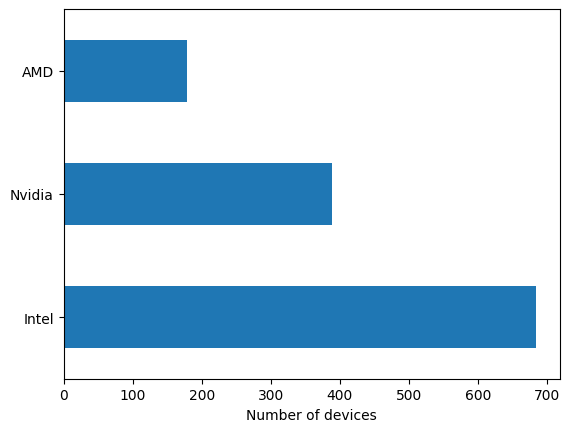

In [79]:
print(f'Value summary of "GPU" feature: ')
print(data['GPU'].value_counts())
data['GPU'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of devices')

There is only one record with ARM GPU. We'll remove this record.

Value summary of "GPU" feature: 
Intel     684
Nvidia    389
AMD       179
Name: GPU, dtype: int64


Text(0.5, 0, 'Number of devices')

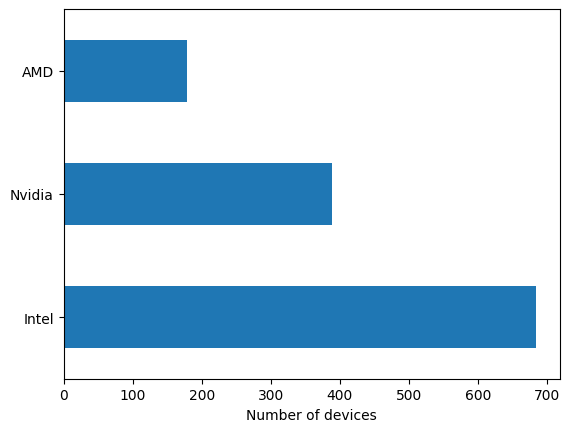

In [80]:
data = data[data['GPU'] != 'ARM']
print(f'Value summary of "GPU" feature: ')
print(data['GPU'].value_counts())
data['GPU'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of devices')

### The "Memory" feature

In [81]:
print(f'Value summary of "Memory" feature: ')
data['Memory'].value_counts()

Value summary of "Memory" feature: 


256GB SSD                        393
1TB HDD                          222
500GB HDD                        132
512GB SSD                        109
128GB SSD +  1TB HDD              93
128GB SSD                         73
256GB SSD +  1TB HDD              73
32GB Flash Storage                31
2TB HDD                           16
512GB SSD +  1TB HDD              14
64GB Flash Storage                12
1TB SSD                           12
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
32GB SSD                           2
256GB SSD +  256GB SSD             2
512GB SSD +  512GB SSD             1
5

Memory can be either in GBs or TBs. They can SSDs, HDDs, Flash Storages or Hybrids. Some devices are having two memory types.<br>
We'll first replace TB and GB. TB we'll replace with 1000 GB so that we have everything in one scale.

In [82]:
data['Memory'] = data['Memory'].str.replace('.0', '')
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('1TB', '1024')
data['Memory'] = data['Memory'].str.replace('2TB', '2048')

C:\Users\junai\AppData\Local\Temp\ipykernel_3840\3926596763.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Memory'] = data['Memory'].str.replace('.0', '')


Now we'll kind of pseudo hot-encode this Memory feature.<br>
We'll create temporary disc_1 and disc_2 and state which type of storage they are. Then we'll combine the values of these two discs into one.

In [83]:
data['disc_1'] = data['Memory'].str.split('+', expand = True)[0]
data['disc_2'] = data['Memory'].str.split('+', expand = True)[1]
data['disc_1'] = data['disc_1'].str.strip()
data['disc_2'] = data['disc_2'].str.strip()
display(data.sample(5))

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros,Resolution,TouchScreen,IPS_Panel,CPU_Brand,CPU_Frequency,GPU,disc_1,disc_2
306,HP,2 in 1 Convertible,13.3,16,256 SSD,Windows 10,1.28,1975.0,2.073600,True,False,Intel Core i7,2.8,Intel,256 SSD,None
1184,HP,Notebook,15.6,6,1024 HDD,Windows 10,2.18,799.0,2.073600,False,True,Intel Core i7,2.6,Nvidia,1024 HDD,None
300,Asus,Notebook,14.0,4,128 SSD,Windows 10,1.30,509.0,1.049088,False,False,Intel Core i3,2.4,Intel,128 SSD,None
265,Dell,2 in 1 Convertible,15.6,8,256 SSD,Windows 10,2.67,799.0,2.073600,True,False,Intel Core i5,1.6,Intel,256 SSD,None
31,Asus,Notebook,14.0,2,32 Flash Storage,Windows 10,1.65,199.0,1.049088,False,False,AMD Processor,1.5,AMD,32 Flash Storage,None


Hot-encoding disc_1

In [84]:
data['disc_1_HDD'] = data['disc_1'].apply(lambda x: 1 if 'HDD' in x else 0)
data['disc_1_SSD'] = data['disc_1'].apply(lambda x: 1 if 'SSD' in x else 0)
data['disc_1_Flash'] = data['disc_1'].apply(lambda x: 1 if 'Flash' in x else 0)
data['disc_1_Hybrid'] = data['disc_1'].apply(lambda x: 1 if 'Hybrid' in x else 0)
data['disc_1_value'] = data['disc_1'].str.split(' ').apply(lambda x: x[0])
data['disc_1_value'] = data['disc_1_value'].astype(int)

In [85]:
data['disc_1_HDD'] = data['disc_1_HDD'] * data['disc_1_value']
data['disc_1_SSD'] = data['disc_1_SSD'] * data['disc_1_value']
data['disc_1_Flash'] = data['disc_1_Flash'] * data['disc_1_value']
data['disc_1_Hybrid'] = data['disc_1_Hybrid'] * data['disc_1_value']
data.drop(columns = ['disc_1_value', 'disc_1'], axis = 1, inplace = True)
display(data.sample(10))

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros,Resolution,TouchScreen,IPS_Panel,CPU_Brand,CPU_Frequency,GPU,disc_2,disc_1_HDD,disc_1_SSD,disc_1_Flash,disc_1_Hybrid
566,Dell,Notebook,15.6,4,0 HDD,Windows 10,1.93,959.00,1.049088,False,False,Intel Core i5,2.6,Intel,None,0,0,0,0
793,Lenovo,2 in 1 Convertible,15.6,8,256 SSD,Windows 10,2.08,959.00,2.073600,True,False,Intel Core i5,2.5,AMD,None,0,256,0,0
1150,Lenovo,Notebook,15.6,4,1024 HDD,No OS,1.90,339.00,1.049088,False,False,Intel Core i3,2.0,Intel,None,1024,0,0,0
296,Acer,Notebook,15.6,8,256 SSD,Linux,2.50,979.00,2.073600,False,False,Intel Core i7,2.8,Nvidia,None,0,256,0,0
907,Acer,Notebook,15.6,4,16 Flash Storage,Chrome OS,2.20,359.00,2.073600,False,True,Other Intel Processor,1.5,Intel,None,0,0,16,0
1183,Acer,Notebook,15.6,4,0 HDD,Windows 10,2.10,333.00,1.049088,False,False,Other Intel Processor,2.0,Intel,None,0,0,0,0
679,Acer,Gaming,15.6,16,256 SSD,Windows 10,2.50,1299.00,2.073600,False,False,Intel Core i5,2.5,Nvidia,None,0,256,0,0
530,Dell,Gaming,17.3,16,128 SSD + 1024 HDD,Windows 10,4.42,3012.77,2.073600,False,True,Intel Core i7,2.8,Nvidia,1024 HDD,0,128,0,0
524,Dell,Notebook,17.3,8,128 SSD + 1024 HDD,Linux,2.80,889.00,2.073600,False,True,Intel Core i5,1.6,AMD,1024 HDD,0,128,0,0
1250,Dell,Notebook,15.6,4,0 HDD,Linux,2.20,324.00,1.049088,False,False,Other Intel Processor,1.6,Intel,None,0,0,0,0


Hot-encoding disc_2

In [86]:
data['disc_2'].fillna('0', inplace = True)
data['disc_2_HDD'] = data['disc_2'].apply(lambda x: 1 if 'HDD' in x else 0)
data['disc_2_SSD'] = data['disc_2'].apply(lambda x: 1 if 'SSD' in x else 0)
data['disc_2_Flash'] = data['disc_2'].apply(lambda x: 1 if 'Flash' in x else 0)
data['disc_2_Hybrid'] = data['disc_2'].apply(lambda x: 1 if 'Hybrid' in x else 0)
data['disc_2_value'] = data['disc_2'].str.split(' ').apply(lambda x: x[0])
data['disc_2_value'] = data['disc_2_value'].astype(int)

In [87]:
data['disc_2_HDD'] = data['disc_2_HDD'] * data['disc_2_value']
data['disc_2_SSD'] = data['disc_2_SSD'] * data['disc_2_value']
data['disc_2_Flash'] = data['disc_2_Flash'] * data['disc_2_value']
data['disc_2_Hybrid'] = data['disc_2_Hybrid'] * data['disc_2_value']
data.drop(columns = ['disc_2_value', 'disc_2'], axis = 1, inplace = True)
display(data.sample(10))

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros,Resolution,TouchScreen,...,CPU_Frequency,GPU,disc_1_HDD,disc_1_SSD,disc_1_Flash,disc_1_Hybrid,disc_2_HDD,disc_2_SSD,disc_2_Flash,disc_2_Hybrid
496,Lenovo,Notebook,15.6,8,256 SSD,Windows 10,2.17,898.9,2.0736,False,...,1.8,Intel,0,256,0,0,0,0,0,0
470,HP,2 in 1 Convertible,13.3,8,512 SSD,Windows 10,1.29,1999.0,8.2944,True,...,1.8,Intel,0,512,0,0,0,0,0,0
991,HP,Notebook,15.6,4,128 SSD + 1024 HDD,Windows 10,2.10,499.0,2.0736,False,...,2.0,AMD,0,128,0,0,1024,0,0,0
511,Acer,Notebook,15.6,4,0 HDD,Windows 10,2.20,639.0,2.0736,False,...,2.7,Nvidia,0,0,0,0,0,0,0,0
799,Dell,Notebook,15.6,8,256 SSD,Windows 10,2.00,739.0,2.0736,False,...,2.0,AMD,0,256,0,0,0,0,0,0
367,Lenovo,Gaming,15.6,8,128 SSD + 1024 HDD,No OS,2.40,809.0,2.0736,False,...,2.5,Nvidia,0,128,0,0,1024,0,0,0
151,Dell,Gaming,15.6,8,1024 Hybrid,Windows 10,2.62,899.0,2.0736,False,...,2.8,Nvidia,0,0,0,1024,0,0,0,0
869,Dell,Workstation,15.6,8,1024 HDD,Windows 10,2.23,1778.0,2.0736,False,...,2.8,Nvidia,1024,0,0,0,0,0,0,0
1298,Lenovo,2 in 1 Convertible,14.0,4,128 SSD,Windows 10,1.80,638.0,2.0736,True,...,2.5,Intel,0,128,0,0,0,0,0,0
589,Asus,Gaming,17.3,8,128 SSD + 1024 HDD,Windows 10,2.73,1770.0,2.0736,False,...,2.5,Nvidia,0,128,0,0,1024,0,0,0


Now we'll combine the disc_1 and disc_2 features into one set of features

In [88]:
data['Memory_HDD'] = data['disc_1_HDD'] + data['disc_2_HDD']
data['Memory_SSD'] = data['disc_1_SSD'] + data['disc_2_SSD']
data['Memory_Flash'] = data['disc_1_Flash'] + data['disc_2_Flash']
data['Memory_Hybrid'] = data['disc_1_Hybrid'] + data['disc_2_Hybrid']
data.drop(columns = ['Memory', 'disc_1_HDD', 'disc_2_HDD', 'disc_1_SSD', 'disc_2_SSD', 'disc_1_Flash', 'disc_2_Flash', 'disc_1_Hybrid', 'disc_2_Hybrid'], axis = 1, inplace = True)
display(data.sample(10))

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution,TouchScreen,IPS_Panel,CPU_Brand,CPU_Frequency,GPU,Memory_HDD,Memory_SSD,Memory_Flash,Memory_Hybrid
629,Dell,Notebook,15.6,8,Windows 10,2.00,1820.0,2.073600,False,False,Intel Core i7,2.8,Nvidia,0,256,0,0
1207,Lenovo,Notebook,15.6,4,Windows 10,2.20,299.0,1.049088,False,False,AMD Processor,2.2,AMD,0,0,0,0
440,Lenovo,Notebook,17.3,8,Windows 10,2.80,519.0,1.440000,False,False,AMD Processor,2.5,AMD,1024,0,0,0
1068,Dell,Gaming,15.6,16,Windows 10,3.21,1329.0,8.294400,False,False,Intel Core i7,2.6,Nvidia,1024,256,0,0
135,HP,Notebook,14.0,8,Windows 10,1.63,988.0,2.073600,False,False,Intel Core i7,1.8,Intel,0,256,0,0
505,Lenovo,Notebook,13.3,8,Windows 10,1.44,949.0,2.073600,False,False,Intel Core i5,2.5,Intel,0,256,0,0
1264,Dell,Notebook,15.6,2,Windows 10,2.20,379.0,1.049088,False,False,Other Intel Processor,1.6,Intel,0,0,0,0
113,HP,Notebook,14.0,4,Windows 10,1.63,722.0,1.049088,False,True,Intel Core i5,1.6,Intel,0,0,0,0
1134,Acer,Notebook,15.6,4,Windows 10,2.23,616.0,2.073600,False,False,Intel Core i5,2.5,Nvidia,1024,0,0,0
331,Toshiba,Notebook,15.6,8,Windows 10,2.00,943.0,2.073600,False,True,Intel Core i5,2.5,Intel,0,256,0,0


### The "OpSys" feature

Value summary of "OpSys" feature: 
Windows 10      1035
No OS             63
Linux             62
Windows 7         45
Chrome OS         22
macOS             13
Mac OS X           8
Android            2
Windows 10 S       2
Name: OpSys, dtype: int64


Text(0.5, 0, 'Number of devices')

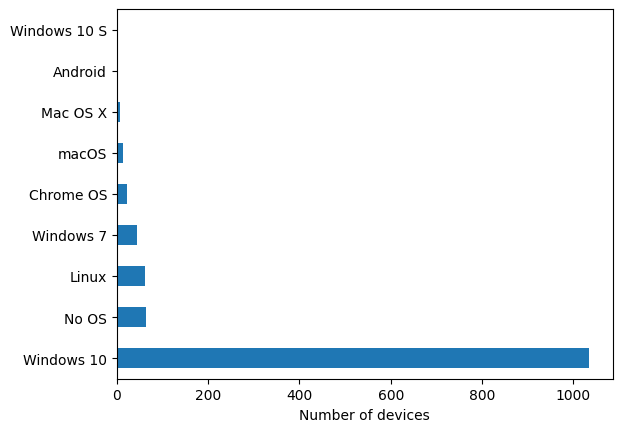

In [89]:
print(f'Value summary of "OpSys" feature: ')
print(data['OpSys'].value_counts())
data['OpSys'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of devices')

Effect of OS type on price


<Axes: xlabel='Price_euros', ylabel='OpSys'>

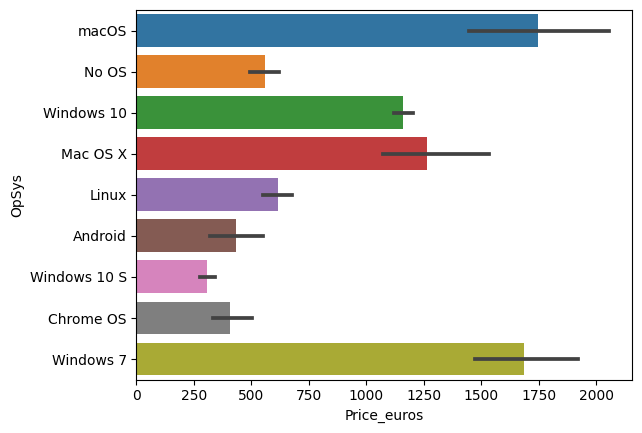

In [90]:
print('Effect of OS type on price')
sb.barplot(x = data['Price_euros'], y = data['OpSys'])

We'll make categories as Windows10, Other Windows OS, Mac OS, Linux, Other OS and No OS

In [91]:
def categorize_OS(input):
    if input == 'Windows 10':
        return 'Windows_10'
    elif input == 'Windows 7' or input == 'Windows 10 S':
        return 'Other_Windows_OS'
    elif input == 'macOS' or input == 'Mac OS  X':
        return 'Mac_OS'
    elif input == 'Chrome OS' or input == 'Android':
        return 'Other_OS'
    else:
        return input

Value summary of "OpSys" feature: 
Windows_10          1035
No OS                 63
Linux                 62
Other_Windows_OS      47
Other_OS              24
Mac_OS                13
Mac OS X               8
Name: OpSys, dtype: int64


Text(0.5, 0, 'Number of devices')

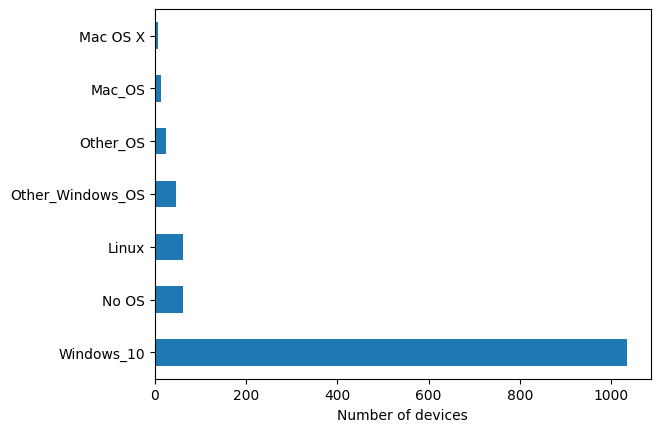

In [92]:
data['OpSys'] = data['OpSys'].apply(categorize_OS)
print(f'Value summary of "OpSys" feature: ')
print(data['OpSys'].value_counts())
data['OpSys'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of devices')

Effect of OS type on price


<Axes: xlabel='Price_euros', ylabel='OpSys'>

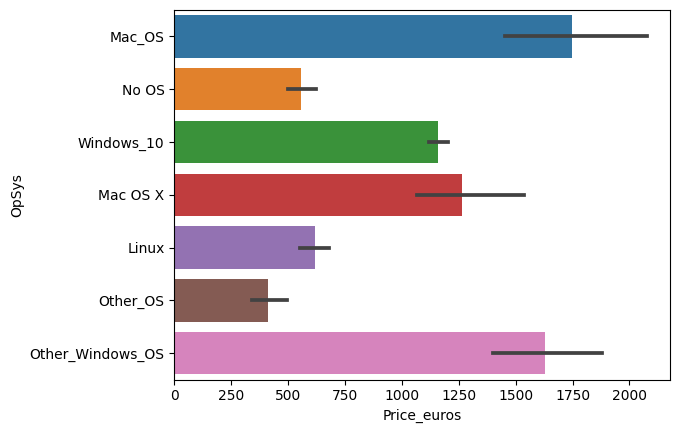

In [93]:
print('Effect of OS type on price')
sb.barplot(x = data['Price_euros'], y = data['OpSys'])

Since the categories of No OS, Linux and other OS almost have the same effect on price, we'll group them into one category.<br>
Let's name this category as Linux/No OS/Other OS

In [94]:
def categorize_OS_further(input):
    if input == 'No OS' or input == 'Linux' or input == 'Other_OS':
        return 'Linux/No_OS/Other_OS'
    else:
        return input

Value summary of "OpSys" feature: 
Windows_10              1035
Linux/No_OS/Other_OS     149
Other_Windows_OS          47
Mac_OS                    13
Mac OS X                   8
Name: OpSys, dtype: int64


Text(0.5, 0, 'Number of devices')

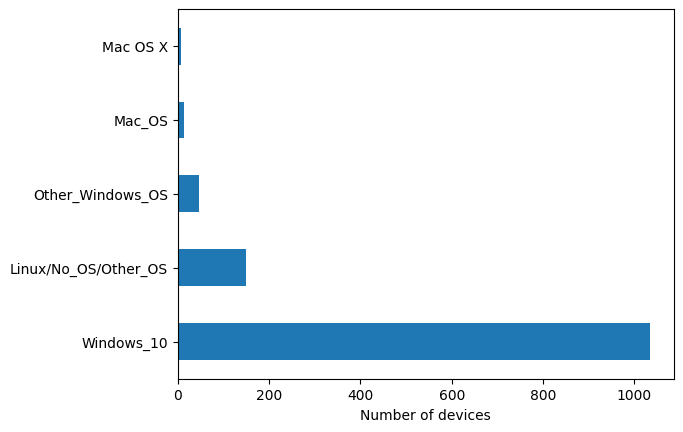

In [95]:
data['OpSys'] = data['OpSys'].apply(categorize_OS_further)
print(f'Value summary of "OpSys" feature: ')
print(data['OpSys'].value_counts())
data['OpSys'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of devices')

Effect of OS type on price


<Axes: xlabel='Price_euros', ylabel='OpSys'>

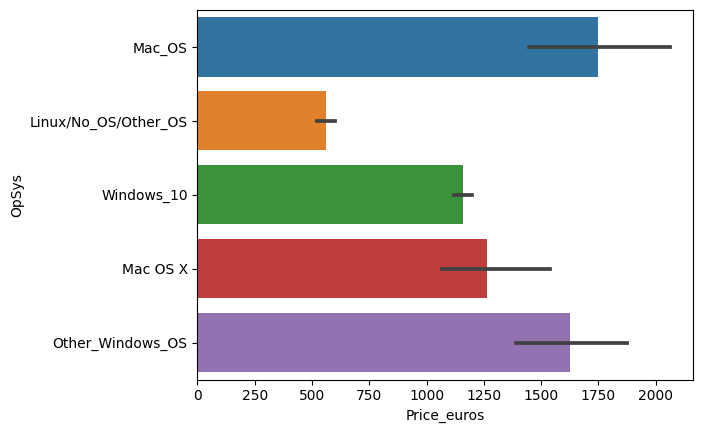

In [96]:
print('Effect of OS type on price')
sb.barplot(x = data['Price_euros'], y = data['OpSys'])

In [97]:
display(data.sample(10))

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution,TouchScreen,IPS_Panel,CPU_Brand,CPU_Frequency,GPU,Memory_HDD,Memory_SSD,Memory_Flash,Memory_Hybrid
274,Toshiba,Notebook,15.6,8,Windows_10,2.20,812.00,1.049088,False,False,Intel Core i7,2.5,Nvidia,0,0,0,0
336,Dell,Ultrabook,15.6,8,Windows_10,1.90,1049.00,2.073600,False,True,Intel Core i5,1.6,Nvidia,1024,128,0,0
1142,HP,2 in 1 Convertible,13.3,8,Windows_10,1.48,1629.00,2.073600,True,False,Intel Core i5,2.4,Intel,0,256,0,0
624,HP,Notebook,15.6,4,Other_Windows_OS,1.88,932.00,1.049088,False,False,Intel Core i5,2.3,Intel,0,0,0,0
861,HP,Notebook,15.6,8,Windows_10,1.84,1349.00,2.073600,False,False,Intel Core i5,2.6,AMD,0,256,0,0
703,Lenovo,Notebook,15.6,4,Windows_10,2.10,621.45,2.073600,False,False,Intel Core i5,2.5,Intel,2048,0,0,0
241,Asus,Notebook,17.3,8,Windows_10,2.10,1145.00,2.073600,False,False,Intel Core i7,1.8,Nvidia,1024,128,0,0
1102,Acer,Notebook,15.6,4,Linux/No_OS/Other_OS,2.20,209.00,1.049088,False,False,Other Intel Processor,1.5,Intel,0,16,0,0
426,Dell,Notebook,15.6,8,Windows_10,2.02,1142.40,2.073600,False,False,Intel Core i7,1.8,AMD,2048,256,0,0
993,Lenovo,Notebook,15.6,8,Windows_10,2.30,1349.00,2.073600,False,False,Intel Core i5,2.3,Intel,0,256,0,0


# Data summary and analytics

Now let's see the correlation of our data with the help of a pairgrid. 

In [98]:
print('Generating plot')
print('Please wait...')
graph = sb.PairGrid(data = data)
graph.map_diag(sb.kdeplot)
graph.map_offdiag(plt.scatter, s = 4)
plot_name = 'PairGrid.png'
plt.savefig(f'outputs/{plot_name}')
print(f'PairPlot saved as {plot_name}')
print('Please view the saved plot.')
plt.close()

Generating plot
Please wait...
PairPlot saved as PairGrid.png
Please view the saved plot.


We'll rename the feature "Ram" to "RAM" and "Price_euros" to "Price". We are doing this just for convinience.

In [99]:
data.rename(columns = {'Ram':'RAM', 'Price_euros':'Price'}, inplace = True)

In [100]:
print(f'Summary of our data: ')
print(data.info())

Summary of our data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1252 non-null   object 
 1   TypeName       1252 non-null   object 
 2   Inches         1252 non-null   float64
 3   RAM            1252 non-null   int32  
 4   OpSys          1252 non-null   object 
 5   Weight         1252 non-null   float64
 6   Price          1252 non-null   float64
 7   Resolution     1252 non-null   float64
 8   TouchScreen    1252 non-null   bool   
 9   IPS_Panel      1252 non-null   bool   
 10  CPU_Brand      1252 non-null   object 
 11  CPU_Frequency  1252 non-null   float64
 12  GPU            1252 non-null   object 
 13  Memory_HDD     1252 non-null   int64  
 14  Memory_SSD     1252 non-null   int64  
 15  Memory_Flash   1252 non-null   int64  
 16  Memory_Hybrid  1252 non-null   int64  
dtypes: bool(2), float64(5), int32(

We can't get a correlation matrix with object dtypes in our dataframe.<br>
So we'll select only the non-object features for this purpose.

In [101]:
data.drop('Resolution', axis = 1, inplace = True)
display(data.head())

,Company,TypeName,Inches,RAM,OpSys,Weight,Price,TouchScreen,IPS_Panel,CPU_Brand,CPU_Frequency,GPU,Memory_HDD,Memory_SSD,Memory_Flash,Memory_Hybrid
0,Apple,Ultrabook,13.3,8,Mac_OS,1.37,1339.69,False,True,Intel Core i5,2.3,Intel,0,128,0,0
1,Apple,Ultrabook,13.3,8,Mac_OS,1.34,898.94,False,False,Intel Core i5,1.8,Intel,0,0,128,0
2,HP,Notebook,15.6,8,Linux/No_OS/Other_OS,1.86,575.00,False,False,Intel Core i5,2.5,Intel,0,256,0,0
3,Apple,Ultrabook,15.4,16,Mac_OS,1.83,2537.45,False,True,Intel Core i7,2.7,AMD,0,512,0,0
4,Apple,Ultrabook,13.3,8,Mac_OS,1.37,1803.60,False,True,Intel Core i5,3.1,Intel,0,256,0,0


In [102]:
columns_for_corr = ['Price', 'Inches', 'RAM', 'Weight', 'TouchScreen', 'IPS_Panel', 'CPU_Frequency', 'Memory_HDD', 'Memory_SSD', 'Memory_Flash', 'Memory_Hybrid']
print(data[columns_for_corr].corr()['Price'].sort_values(ascending = False))

Price            1.000000
RAM              0.729829
Memory_SSD       0.650926
CPU_Frequency    0.424599
IPS_Panel        0.290021
Weight           0.210915
TouchScreen      0.164223
Inches           0.057743
Memory_Hybrid    0.010897
Memory_HDD      -0.018119
Memory_Flash    -0.027363
Name: Price, dtype: float64


In [103]:
print(f'Summary of our data: ')
print(data.info())

Summary of our data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1252 non-null   object 
 1   TypeName       1252 non-null   object 
 2   Inches         1252 non-null   float64
 3   RAM            1252 non-null   int32  
 4   OpSys          1252 non-null   object 
 5   Weight         1252 non-null   float64
 6   Price          1252 non-null   float64
 7   TouchScreen    1252 non-null   bool   
 8   IPS_Panel      1252 non-null   bool   
 9   CPU_Brand      1252 non-null   object 
 10  CPU_Frequency  1252 non-null   float64
 11  GPU            1252 non-null   object 
 12  Memory_HDD     1252 non-null   int64  
 13  Memory_SSD     1252 non-null   int64  
 14  Memory_Flash   1252 non-null   int64  
 15  Memory_Hybrid  1252 non-null   int64  
dtypes: bool(2), float64(4), int32(1), int64(4), object(5)
memory usage: 144.3+

# Saving the processed data for model training

In [104]:
file_name = 'preprocessed_data.csv'
data.to_csv(f'csvs/{file_name}', index=False)
print(f'DataFrame saved as {file_name}')

DataFrame saved as preprocessed_data.csv
